In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

In [5]:
#Data Operations

####################################################################################
# Data from Files
def GetData1(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])

    return x, y, err, xstep, ystep

def GetData2(filename1,filename2):
    x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    x = x1
    y = 0.5*(y1+y2)
    err = 0.5*np.sqrt(err1*err1+err2*err2)
    xstep = xstep1
    ystep = 0.5*(ystep1+ystep2)
    return x, y, err, xstep, ystep

def GetExpData(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])
    sysp = np.append(data[:,6],data[-1,6])
    sysm = -sysp
    #print(len(data[0,:]))
    if len(data[0,:]) > 7:
        sysm = np.append(data[:,7],data[-1,7])
    return x, y, err, xstep, ystep, sysp, sysm

def GetDataRatio(x1, y1, err1, xstep1, ystep1, x2, y2, err2, xstep2, ystep2):
    x = x1
    y, err = RatioError(y1, err1, y2, err2)
    xstep = xstep1
    ystep = ystep1/ystep2
    return x, y, err, xstep, ystep

####################################################################################
# Errors
def RatioError(y1, err1, y2, err2):
    return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )

def ProdError(y1, err1, y2, err2):
    return y1*y2, np.sqrt( y2*y2*err1*err1 + y1*y1*err2*err2 )

def SumError(y1, err1, y2, err2, pm=1.):
    return y1 + pm*y2, np.sqrt( err1*err1 + err2*err2 )
####################################################################################
# Integration
def GetData1Integrate(filename,bin=0):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]

    dx = 1.0
    if bin == 1:
      dx = data[:,2] - data[:,1]
    
    y = data[:,3]*dx
    err = data[:,4]*dx
    err2 = err*err

    for i in range(1,len(y)):
      y[i]=y[i-1]+y[i]
      err2[i]=err2[i-1]+err2[i]

    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(y[:],y[-1])
    err = np.sqrt(err2)

    return x, y, err, xstep, ystep


# Data from Files
def GetDataRaw(filename, bin=1):
    data = np.loadtxt(filename, comments='#')

    n_jet = data[:,5]
    binsize = data[:,2] - data[:,1]
    x = data[:,0]
    y = data[:,3]/binsize/n_jet
    err = data[:,4]/binsize/n_jet
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(y,y[-1])


    return x, y, err, xstep, ystep

    # 0-10%, $R=0.2$, PGUN

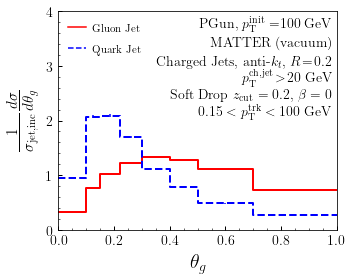

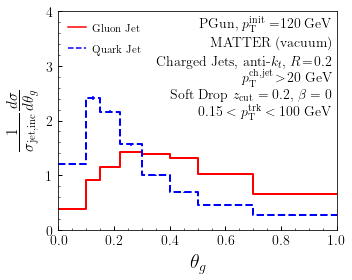

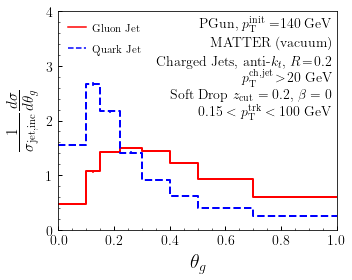

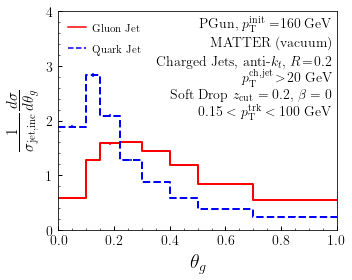

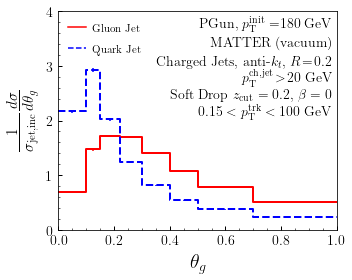

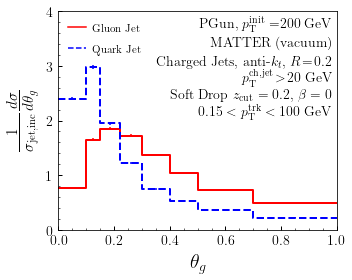

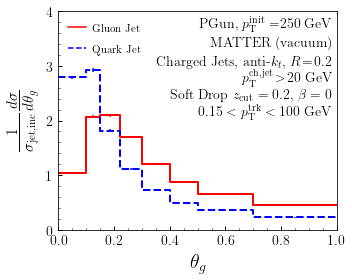

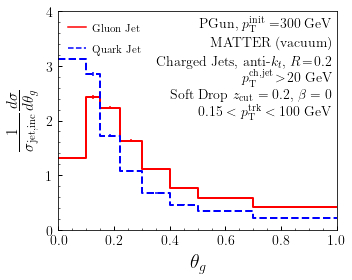

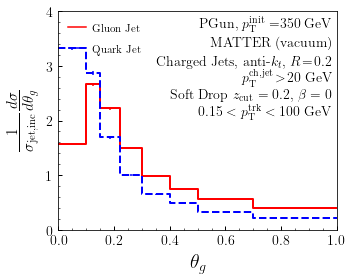

In [6]:
pinit_list = ['100','120','140','160','180','200','250','300','350']

for pinit in pinit_list: 

  fig, axs = plt.subplots(1, 1, figsize=(5, 4))

  ###############
  # THEORY
  theory_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Gluon/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_t, y_t, err_t, xstep_t, ystep_t = GetDataRaw(theory_data)
  axs.step(xstep_t, ystep_t, where='post', color='red',linestyle='solid', linewidth = 2)
  axs.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='red')
  tcurve1 = axs.errorbar(0, 0, color='red',linestyle='solid')

  theory_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Quark/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_t, y_t, err_t, xstep_t, ystep_t = GetDataRaw(theory_data)
  axs.step(xstep_t, ystep_t, where='post', color='blue',linestyle='dashed', linewidth = 2)
  axs.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='blue')
  tcurve2 = axs.errorbar(0, 0, color='blue',linestyle='dashed')



  # ###############
  axs.tick_params(labelsize = 14)
  axs.set_xlabel(r'$\theta_g$', fontsize=20, labelpad=6)
  axs.set_xticks([0.0,0.2,0.4,0.6,0.8,1])
  axs.set_xlim(0,1)    
  axs.tick_params(width = 1, length = 4, pad=5)
  axs.label_outer()
  # ######
  axs.set_ylim(0,4) 
  axs.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d \theta_g}$', fontsize=22, labelpad=8)
  # ######
  axs.text(0.98, 3.7, r'PGun, $p_{\mathrm{T}}^{\mathrm{init}}=$'+pinit+' GeV', fontsize = 14, ha = 'right')
  axs.text(0.98, 3.35, r'MATTER (vacuum)', fontsize = 14, ha = 'right')
  axs.text(0.98, 3., r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'right')
  axs.text(0.98, 2.7, r'$p_{\mathrm{T}}^{\mathrm{ch,jet}}\!>\!20$ GeV', fontsize = 14, ha = 'right')
  axs.text(0.98, 2.4, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
  axs.text(0.98, 2.1, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')

  handles = [tcurve1,tcurve2]
  labels = ['Gluon Jet', 'Quark Jet']

  axs.legend(handles,labels,ncol=1,loc='upper left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 1), borderaxespad=0.5, handlelength=1.6, fontsize=11)

  # Generate PDF File
  plt.tight_layout()
  plt.savefig('Plots/TG_PGUN_PP_R02_p{}.pdf'.format(pinit))

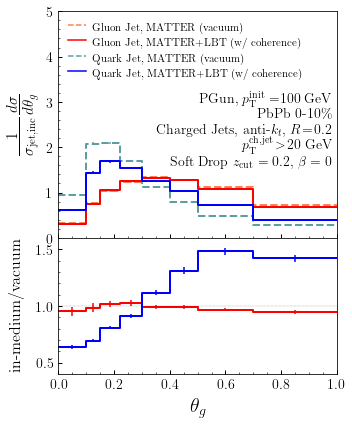

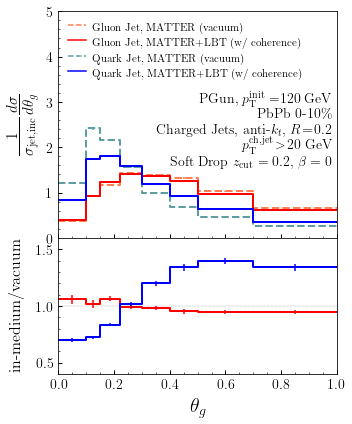

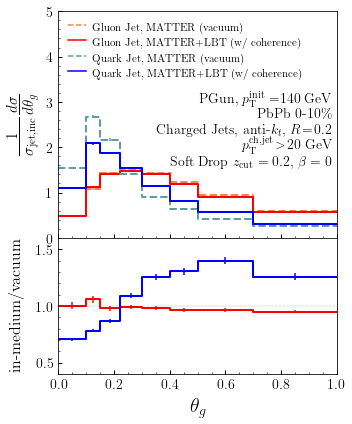

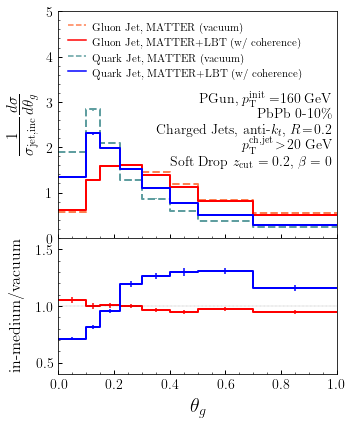

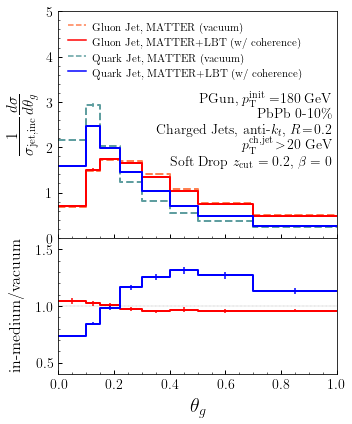

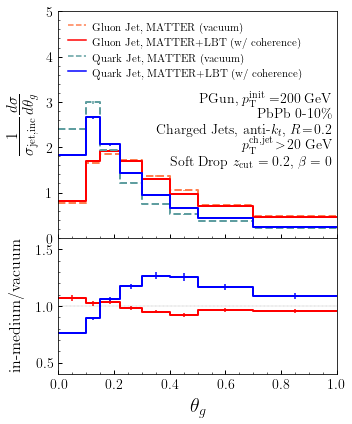

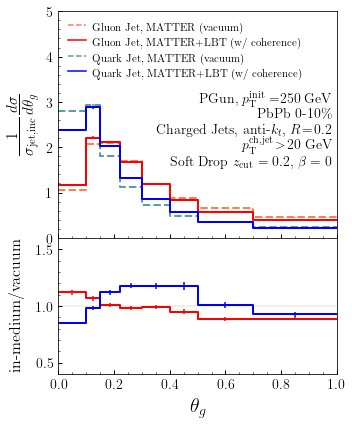

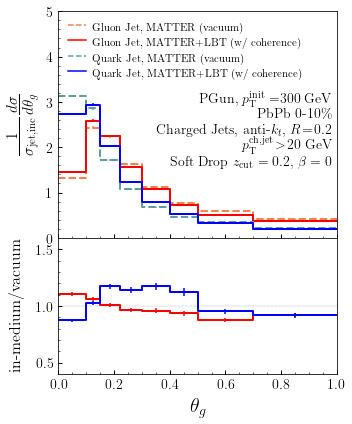

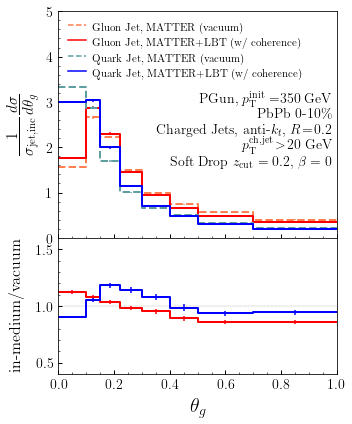

In [7]:
pinit_list = ['100','120','140','160','180','200','250','300','350']

for pinit in pinit_list: 

  fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
  axt, axb  = axs

  ###############
  # THEORY
  ## PP Gluon
  theory_pp_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Gluon/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g = GetDataRaw(theory_pp_g)
  axt.step(xstep_pp_g, ystep_pp_g, where='post', color='coral',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_g, y_pp_g, err_pp_g, marker="", linestyle="none", color='coral')
  tcurve_pp_g = axt.errorbar(0, 0, color='coral',linestyle='dashed')
  ## AA Gluon
  theory_aa_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_gluon/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRaw(theory_aa_g)
  axt.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')
  tcurve_aa_g = axt.errorbar(0, 0, color='red',linestyle='solid')
  #
  ## PP Quark
  theory_pp_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Quark/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q = GetDataRaw(theory_pp_q)
  axt.step(xstep_pp_q, ystep_pp_q, where='post', color='cadetblue',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_q, y_pp_q, err_pp_q, marker="", linestyle="none", color='cadetblue')
  tcurve_pp_q = axt.errorbar(0, 0, color='cadetblue',linestyle='dashed')
  ## AA Gluon
  theory_aa_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_quark/hist_ptHat{}-{}_SoftDropGroom_thetaG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRaw(theory_aa_q)
  axt.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')
  tcurve_aa_q = axt.errorbar(0, 0, color='blue',linestyle='solid')
  ############
  # PbPb/PP
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRatio(x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g, x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g)
  axb.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')

  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRatio(x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q, x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q)
  axb.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')



  ###############
  for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\theta_g$', fontsize=20, labelpad=6)
    ax.set_xlabel(r'$r_{\mathrm{g}}/R$', fontsize=20, labelpad=6)    
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_xlim(0,1)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
  ######
  axt.set_ylim(0,5) 
  axb.set_ylim(0.4,1.6) 
  axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d \theta_g}$', fontsize=22, labelpad=8)
  axb.set_ylabel(r'in-medium/vacuum', fontsize=16, labelpad=12)
  axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
  ###############
  axt.text(0.98, 3., r'PGun, $p_{\mathrm{T}}^{\mathrm{init}}=$'+pinit+' GeV', fontsize = 14, ha = 'right')
  axt.text(0.98, 2.65, r'PbPb 0-10\%', fontsize = 14, ha = 'right')
  axt.text(0.98, 2.3, r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'right')
  axt.text(0.98, 1.95, r'$p_{\mathrm{T}}^{\mathrm{ch,jet}}\!>\!20$ GeV', fontsize = 14, ha = 'right')
  axt.text(0.98, 1.6, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
#  axt.text(0.98, 1.25, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')


  handles = [tcurve_pp_g, tcurve_aa_g, tcurve_pp_q, tcurve_aa_q]
  labels = ['Gluon Jet, MATTER (vacuum)', 'Gluon Jet, MATTER+LBT (w/ coherence)','Quark Jet, MATTER (vacuum)', 'Quark Jet, MATTER+LBT (w/ coherence)']

  axt.legend(handles,labels,ncol=1,loc='upper left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0, bbox_to_anchor=(0, 1.01), borderaxespad=0.5, handlelength=1.6, fontsize=11)

  # Generate PDF File
  plt.tight_layout()
  plt.savefig('Plots/TG_PGUN_0-10_R02_p{}.pdf'.format(pinit))

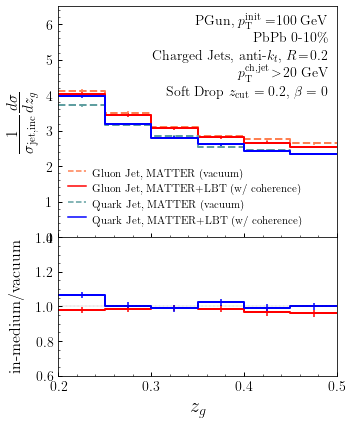

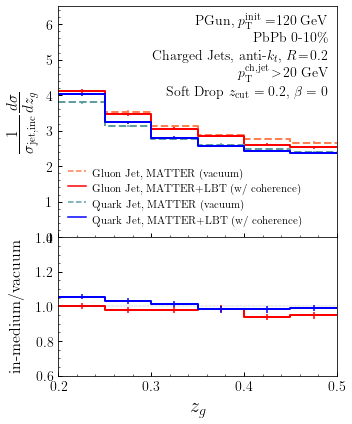

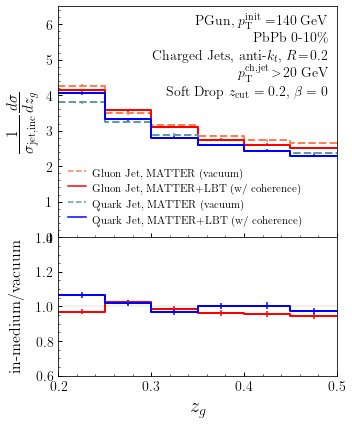

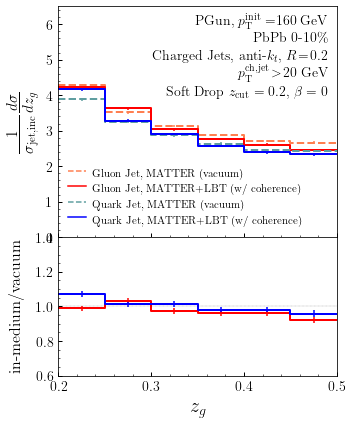

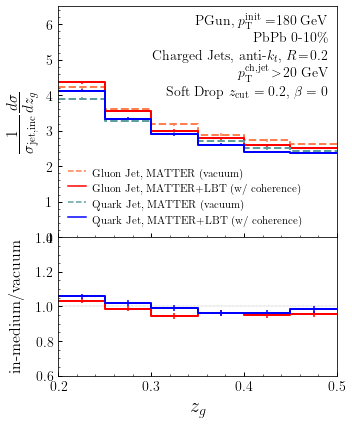

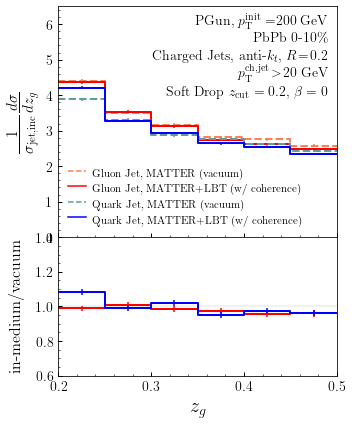

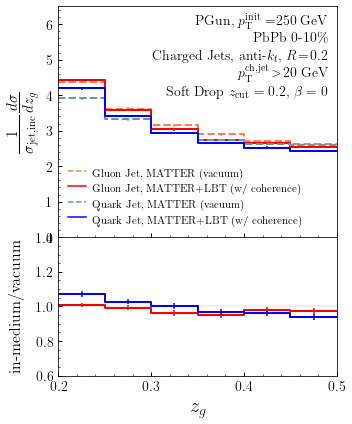

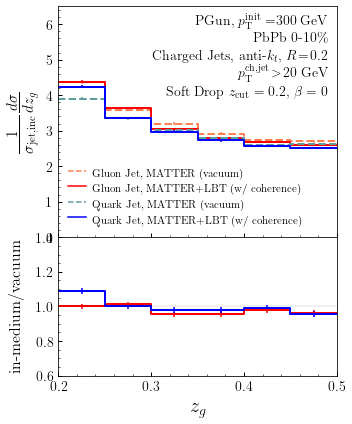

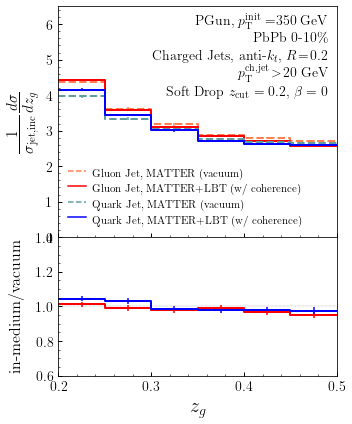

In [118]:
pinit_list = ['100','120','140','160','180','200','250','300','350']

for pinit in pinit_list: 

  fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
  axt, axb  = axs

  ###############
  # THEORY
  ## PP Gluon
  theory_pp_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Gluon/hist_ptHat{}-{}_SoftDropGroom_zG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g = GetDataRaw(theory_pp_g)
  axt.step(xstep_pp_g, ystep_pp_g, where='post', color='coral',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_g, y_pp_g, err_pp_g, marker="", linestyle="none", color='coral')
  tcurve_pp_g = axt.errorbar(0, 0, color='coral',linestyle='dashed')
  ## AA Gluon
  theory_aa_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_gluon/hist_ptHat{}-{}_SoftDropGroom_zG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRaw(theory_aa_g)
  axt.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')
  tcurve_aa_g = axt.errorbar(0, 0, color='red',linestyle='solid')
  #
  ## PP Quark
  theory_pp_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Quark/hist_ptHat{}-{}_SoftDropGroom_zG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q = GetDataRaw(theory_pp_q)
  axt.step(xstep_pp_q, ystep_pp_q, where='post', color='cadetblue',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_q, y_pp_q, err_pp_q, marker="", linestyle="none", color='cadetblue')
  tcurve_pp_q = axt.errorbar(0, 0, color='cadetblue',linestyle='dashed')
  ## AA Gluon
  theory_aa_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_quark/hist_ptHat{}-{}_SoftDropGroom_zG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRaw(theory_aa_q)
  axt.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')
  tcurve_aa_q = axt.errorbar(0, 0, color='blue',linestyle='solid')
  ############
  # PbPb/PP
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRatio(x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g, x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g)
  axb.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')

  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRatio(x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q, x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q)
  axb.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')



  ###############
  for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
    ax.set_xticks([0.2,0.3,0.4,0.5])
    ax.set_xlim(0.2,0.5)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
  ######
  axt.set_ylim(0,6.5) 
  axb.set_ylim(0.6,1.4) 
  axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}$', fontsize=22, labelpad=8)
  axb.set_ylabel(r'in-medium/vacuum', fontsize=16, labelpad=12)
  axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
  ###############
  axt.text(0.49, 6., r'PGun, $p_{\mathrm{T}}^{\mathrm{init}}=$'+pinit+' GeV', fontsize = 14, ha = 'right')
  axt.text(0.49, 5.5, r'PbPb 0-10\%', fontsize = 14, ha = 'right')
  axt.text(0.49, 5, r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'right')
  axt.text(0.49, 4.5, r'$p_{\mathrm{T}}^{\mathrm{ch,jet}}\!>\!20$ GeV', fontsize = 14, ha = 'right')
  axt.text(0.49, 4, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
#  axt.text(0.98, 1.25, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')


  handles = [tcurve_pp_g, tcurve_aa_g, tcurve_pp_q, tcurve_aa_q]
  labels = ['Gluon Jet, MATTER (vacuum)', 'Gluon Jet, MATTER+LBT (w/ coherence)','Quark Jet, MATTER (vacuum)', 'Quark Jet, MATTER+LBT (w/ coherence)']

  axt.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

  # Generate PDF File
  plt.tight_layout()
  plt.savefig('Plots/ZG_PGUN_0-10_R02_p{}.pdf'.format(pinit))

<ipython-input-10-043a78804eac>:49: RuntimeWarning: invalid value encountered in true_divide
  return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )
<ipython-input-10-043a78804eac>:43: RuntimeWarning: invalid value encountered in true_divide
  ystep = ystep1/ystep2
<ipython-input-10-043a78804eac>:49: RuntimeWarning: invalid value encountered in true_divide
  return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )
<ipython-input-10-043a78804eac>:43: RuntimeWarning: invalid value encountered in true_divide
  ystep = ystep1/ystep2


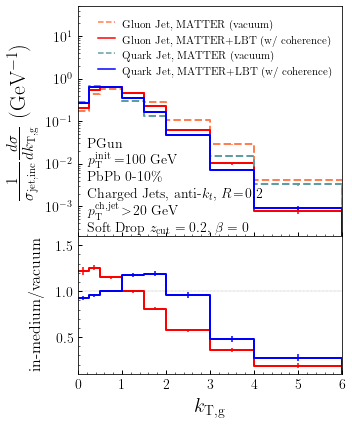

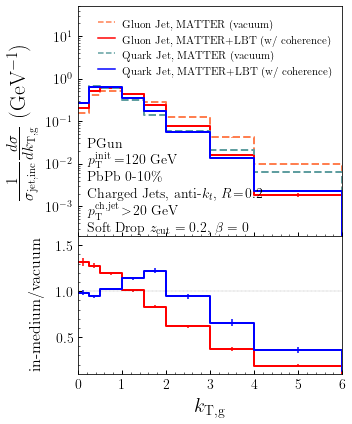

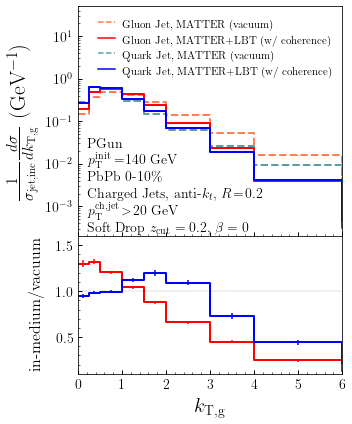

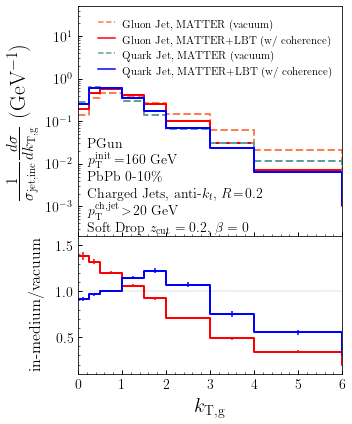

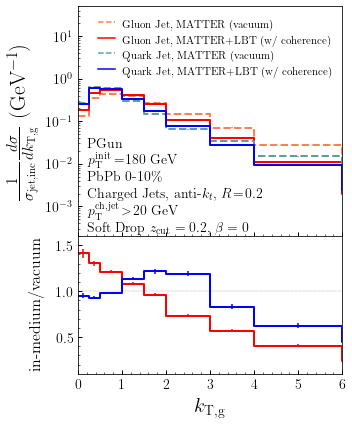

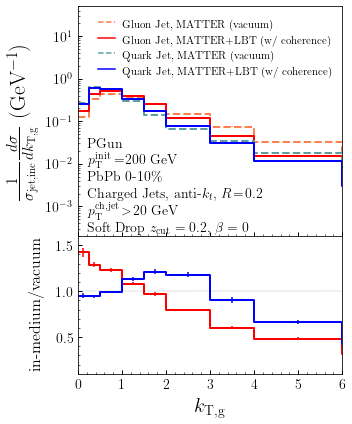

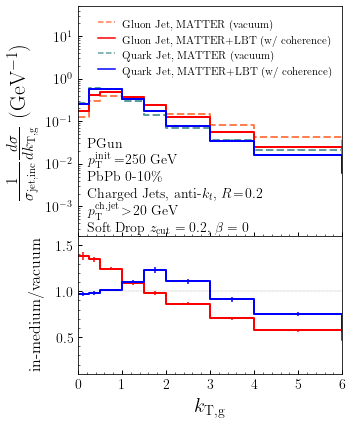

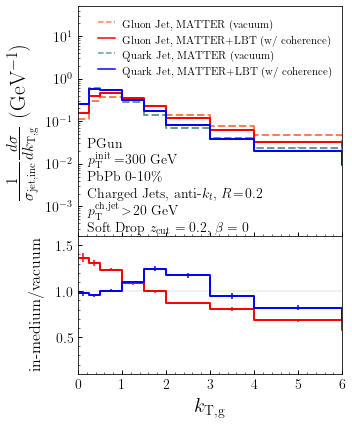

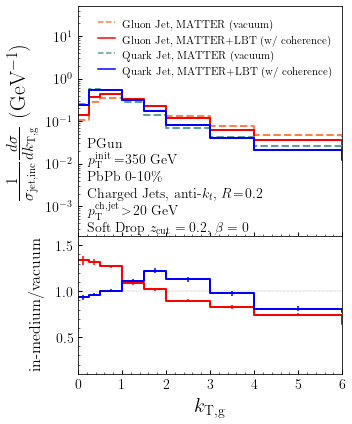

In [159]:
pinit_list = ['100','120','140','160','180','200','250','300','350']

for pinit in pinit_list: 

  fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
  axt, axb  = axs

  ###############
  # THEORY
  ## PP Gluon
  theory_pp_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Gluon/hist_ptHat{}-{}_SoftDropGroom_ktG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g = GetDataRaw(theory_pp_g)
  axt.step(xstep_pp_g, ystep_pp_g, where='post', color='coral',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_g, y_pp_g, err_pp_g, marker="", linestyle="none", color='coral')
  tcurve_pp_g = axt.errorbar(0, 0, color='coral',linestyle='dashed')
  ## AA Gluon
  theory_aa_g = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_gluon/hist_ptHat{}-{}_SoftDropGroom_ktG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRaw(theory_aa_g)
  axt.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')
  tcurve_aa_g = axt.errorbar(0, 0, color='red',linestyle='solid')
  #
  ## PP Quark
  theory_pp_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/PP_Quark/hist_ptHat{}-{}_SoftDropGroom_ktG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q = GetDataRaw(theory_pp_q)
  axt.step(xstep_pp_q, ystep_pp_q, where='post', color='cadetblue',linestyle='dashed', linewidth = 2)
  axt.errorbar(x_pp_q, y_pp_q, err_pp_q, marker="", linestyle="none", color='cadetblue')
  tcurve_pp_q = axt.errorbar(0, 0, color='cadetblue',linestyle='dashed')
  ## AA Gluon
  theory_aa_q = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_PGUN/matter_lbt_pgun_pbpb_0-10_quark/hist_ptHat{}-{}_SoftDropGroom_ktG_jetr0.2_ptj20-2500_rapj0.0-0.9_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'.format(pinit,pinit)
  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRaw(theory_aa_q)
  axt.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axt.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')
  tcurve_aa_q = axt.errorbar(0, 0, color='blue',linestyle='solid')
  ############
  # PbPb/PP
  x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g = GetDataRatio(x_aa_g, y_aa_g, err_aa_g, xstep_aa_g, ystep_aa_g, x_pp_g, y_pp_g, err_pp_g, xstep_pp_g, ystep_pp_g)
  axb.step(xstep_aa_g, ystep_aa_g, where='post', color='red',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_g, y_aa_g, err_aa_g, marker="", linestyle="none", color='red')

  x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q = GetDataRatio(x_aa_q, y_aa_q, err_aa_q, xstep_aa_q, ystep_aa_q, x_pp_q, y_pp_q, err_pp_q, xstep_pp_q, ystep_pp_q)
  axb.step(xstep_aa_q, ystep_aa_q, where='post', color='blue',linestyle='solid', linewidth = 2)
  axb.errorbar(x_aa_q, y_aa_q, err_aa_q, marker="", linestyle="none", color='blue')



  ###############
  for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$k_{\mathrm{T,g}}$', fontsize=20, labelpad=6)
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xlim(0,6)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
  ######
  axt.set_yscale('log')
  # ######
  axt.set_ylim(0.0002,50) 
  axb.set_ylim(0.1,1.6) 
  axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d k_{\mathrm{T,g}}}$ (GeV$^{-1}$)', fontsize=22, labelpad=8)
  axb.set_ylabel(r'in-medium/vacuum', fontsize=16, labelpad=12)
  axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
  ###############
  axt.text(0.2, 0.01*(10**(0.4)), r'PGun', fontsize = 14, ha = 'left')  
  axt.text(0.2, 0.01, r'$p_{\mathrm{T}}^{\mathrm{init}}=$'+pinit+' GeV', fontsize = 14, ha = 'left')
  axt.text(0.2, 0.01*(10**(-0.4)), r'PbPb 0-10\%', fontsize = 14, ha = 'left')
  axt.text(0.2, 0.01*(10**(-0.4*2)), r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'left')
  axt.text(0.2, 0.01*(10**(-0.4*3)), r'$p_{\mathrm{T}}^{\mathrm{ch,jet}}\!>\!20$ GeV', fontsize = 14, ha = 'left')
  axt.text(0.2, 0.01*(10**(-0.4*4)), r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'left')
# axt.text(5.9, 0.7*(10**(-0.15*5)),  r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')



  handles = [tcurve_pp_g, tcurve_aa_g, tcurve_pp_q, tcurve_aa_q]
  labels = ['Gluon Jet, MATTER (vacuum)', 'Gluon Jet, MATTER+LBT (w/ coherence)','Quark Jet, MATTER (vacuum)', 'Quark Jet, MATTER+LBT (w/ coherence)']

  axt.legend(handles,labels,ncol=1,loc='upper right',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0, bbox_to_anchor=(1, 1), borderaxespad=0.5, handlelength=1.6, fontsize=11)

  # Generate PDF File
  plt.tight_layout()
  plt.savefig('Plots/KG_PGUN_0-10_R02_p{}.pdf'.format(pinit))